In [90]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [163]:
# Import each sample, flatten each sample, put into X_tr (15,11400)
num_sampertype = 5
num_types = 3
num_samples = num_sampertype*num_types
num_feats = 114
num_timesteps = 100
#X_tr = np.zeros((num_samples, num_feats*num_timesteps))
X_tr = np.zeros((num_feats, num_samples*num_timesteps))

types = ['jumping','running','walking']
s = 0
for type in types:
    for i in range(1,6):
        sample_path = f'/Users/jadeg/Documents/UW/winter/AMATH 582/HW2/hw2data/train/{type}_{i}.npy'
        sample = np.load(sample_path)
        X_tr[:, s * num_timesteps : (s + 1) * num_timesteps] = sample  # Stack in time direction
        s += 1


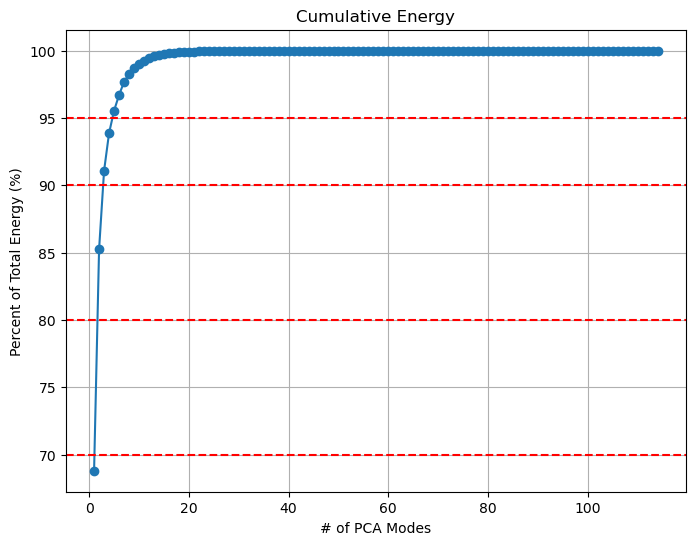

In [ ]:
# Task 1, Use sklearn.decomposition to apply PCA

# apply PCA with full SVD
pca = PCA()
X_pca = pca.fit_transform(X_tr.T) #reduce dimensions
S = pca.singular_values_
norm_full = np.sqrt(np.sum(S**2))

# apply PCA with approximation (low rank SVD)
x = np.arange(1,num_feats+1)
y = np.zeros(num_feats)
j = 0
for n_nodes in x:
    S_n = S[0:n_nodes]
    norm_approx = np.sqrt(np.sum(S_n**2)) 
    y[j] = (norm_approx/norm_full) * 100
    j+= 1
# plot cumulative energy
plt.figure(figsize=(8,6))

plt.plot(x,y,'o-')
plt.grid()

# add lines are percents in problem statement
percs = [70,80,90,95]
for perc in percs:
    plt.axhline(y=perc, color='r', linestyle='--')

plt.xlabel('# of PCA Modes')

plt.ylabel('Percent of Total Energy (%)')
plt.title('Cumulative Energy')
#plt.xlim([0,15])
#plt.savefig('/Users/jadeg/Documents/UW/winter/AMATH 582/HW2/ZoomedCumEnergy.png')
plt.savefig('/Users/jadeg/Documents/UW/winter/AMATH 582/HW2/CumEnergy.png')

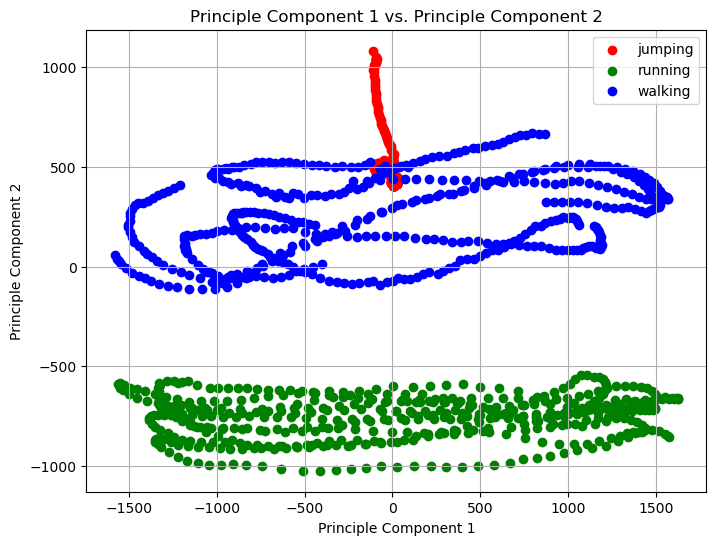

In [226]:
# Task 2a: truncate to 2 modes and plot

# pull out PC1 and PC2
PC1 = X_pca[:,0]
PC2 = X_pca[:,1]

# plot cumulative energy
plt.figure(figsize=(8,6))
plt.grid()

colors = ['r', 'g', 'b']
labels = ['jumping', 'running', 'walking']

for i, activity in enumerate(labels):
    start_idx = i * num_sampertype*num_timesteps   # Each activity has 5 samples, each with 100 timesteps
    end_idx = (i+1) * num_sampertype*num_timesteps
    plt.scatter(PC1[start_idx:end_idx], PC2[start_idx:end_idx], 
                c=colors[i], label=activity)

plt.legend()
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Principle Component 1 vs. Principle Component 2')
plt.savefig('/Users/jadeg/Documents/UW/winter/AMATH 582/HW2/2D_PC.png')

Plotting jumping: start_idx=0, end_idx=500
Plotting running: start_idx=500, end_idx=1000
Plotting walking: start_idx=1000, end_idx=1500


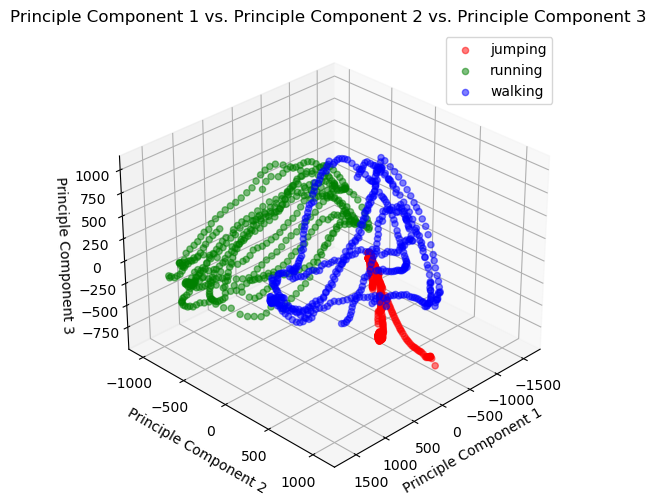

In [227]:
# Task 2b: truncate to 3 modes and plot

# pull out PC3
PC3 = X_pca[:,2]

# plot cumulative energy
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')


colors = ['r', 'g', 'b']
labels = ['jumping', 'running', 'walking']

for i, activity in enumerate(labels):
    start_idx = i * num_sampertype*num_timesteps   # Each activity has 5 samples, each with 100 timesteps
    end_idx = (i+1) * num_sampertype*num_timesteps
    print(f"Plotting {activity}: start_idx={start_idx}, end_idx={end_idx}")  # Debug print
    ax.scatter(PC1[start_idx:end_idx], PC2[start_idx:end_idx], PC3[start_idx:end_idx],
               c=colors[i], label=activity, alpha=0.5)

plt.legend()
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_zlabel('Principle Component 3')
ax.view_init(elev=30, azim=45)
plt.title('Principle Component 1 vs. Principle Component 2 vs. Principle Component 3')
plt.savefig('/Users/jadeg/Documents/UW/winter/AMATH 582/HW2/3D_PC.png')

In [196]:
# Task 3 - create vector of ground truth labels and assign a label to each sample and compute mean

# create vector of ground truth labels
ground_truth_labs = np.array([0]*num_sampertype + [1]*num_sampertype + [2]*num_sampertype)

# reduce data to k modes
k = 12
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_tr) #reduce dimensions

# compute centroids
centroids = {}

# compute mean for each principle component
for label in ground_truth_labs:  # Iterate over labels (0, 1, 2)
    centroids[label] = np.mean(X_pca[ground_truth_labs == label], axis=0)

print(centroids)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 114 but corresponding boolean dimension is 15

In [ ]:
# Task 4 - 